In [1]:
from PIL import Image
#import cv2
import numpy as np
from PIL.ImageOps import grayscale
from matplotlib import pyplot as plt
import pandas as pd
import os
import seaborn as sns
#import mahotas

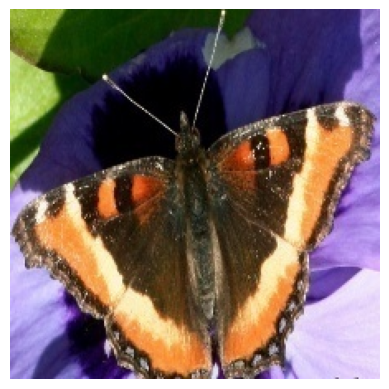

In [81]:
image = Image.open("data/train/Image_1200.jpg")
plt.imshow(image)
plt.axis("off")
None

In [2]:
df = pd.read_csv("./data/Training_set.csv")
file_names = df.iloc[:, 0].tolist()

In [3]:
heights = []
widths = []
for file_name in file_names:
    try:
        with Image.open(f"data/train/{file_name}") as img:
            width, height = img.size
            heights.append(height)
            widths.append(width)
    except FileNotFoundError:
        heights.append(None)
        widths.append(None)
        print(file_name + " is not available")
        continue

In [4]:
df['height'] = heights
df['width'] = widths

Text(0, 0.5, 'Count')

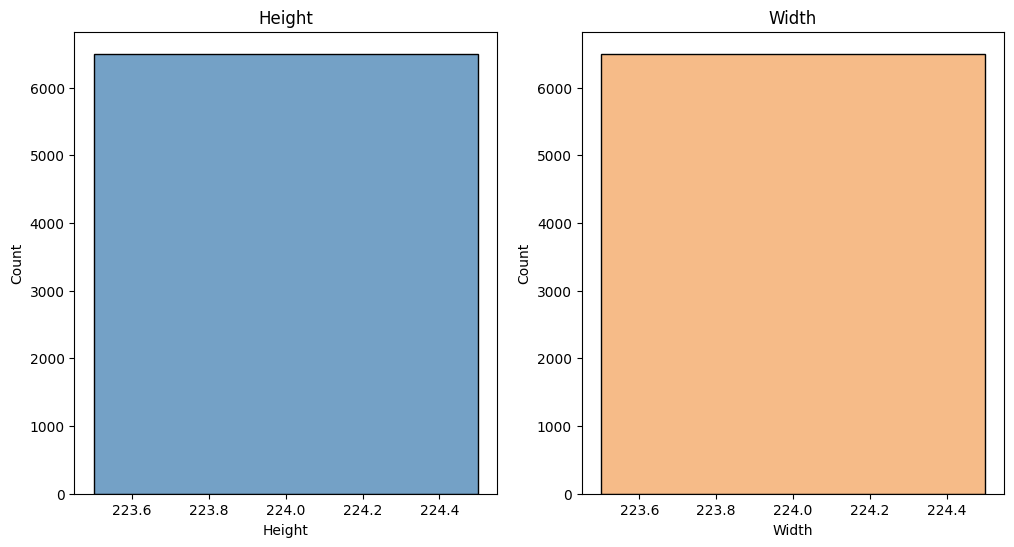

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='height', color='steelblue', ax=axes[0])
axes[0].set_title('Height')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Count')

sns.histplot(data=df, x='width', color='sandybrown', ax=axes[1])
axes[1].set_title('Width')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Count')


## Wszystkie obrazy mają wymiary 224x224

In [8]:
imgs = []

for file_name in file_names:
    try:
        imgs.append(np.array(Image.open(f"data/train/{file_name}")))
    except:
        print(file_name + " is not available")
        continue

In [35]:
blues = []
greens = []
reds = []

for img in imgs:
    b_channel, g_channel, r_channel = img[:, : ,0], img[:, : ,1], img[:, :, 2]
    blues.append(b_channel)
    greens.append(g_channel)
    reds.append(r_channel)

In [36]:
greens2 = np.stack(greens, axis=-1)
blues2 = np.stack(blues, axis=-1)
reds2 = np.stack(reds, axis=-1)

In [37]:
blues2.shape

(224, 224, 6499)

In [38]:
img.shape

(224, 224, 3)

In [39]:
var_per_pixel_green = greens2.var(axis=-1)
var_per_pixel_blue = blues2.var(axis=-1)
var_per_pixel_red = reds2.var(axis=2)

## Wariancja pikselów dla danego koloru

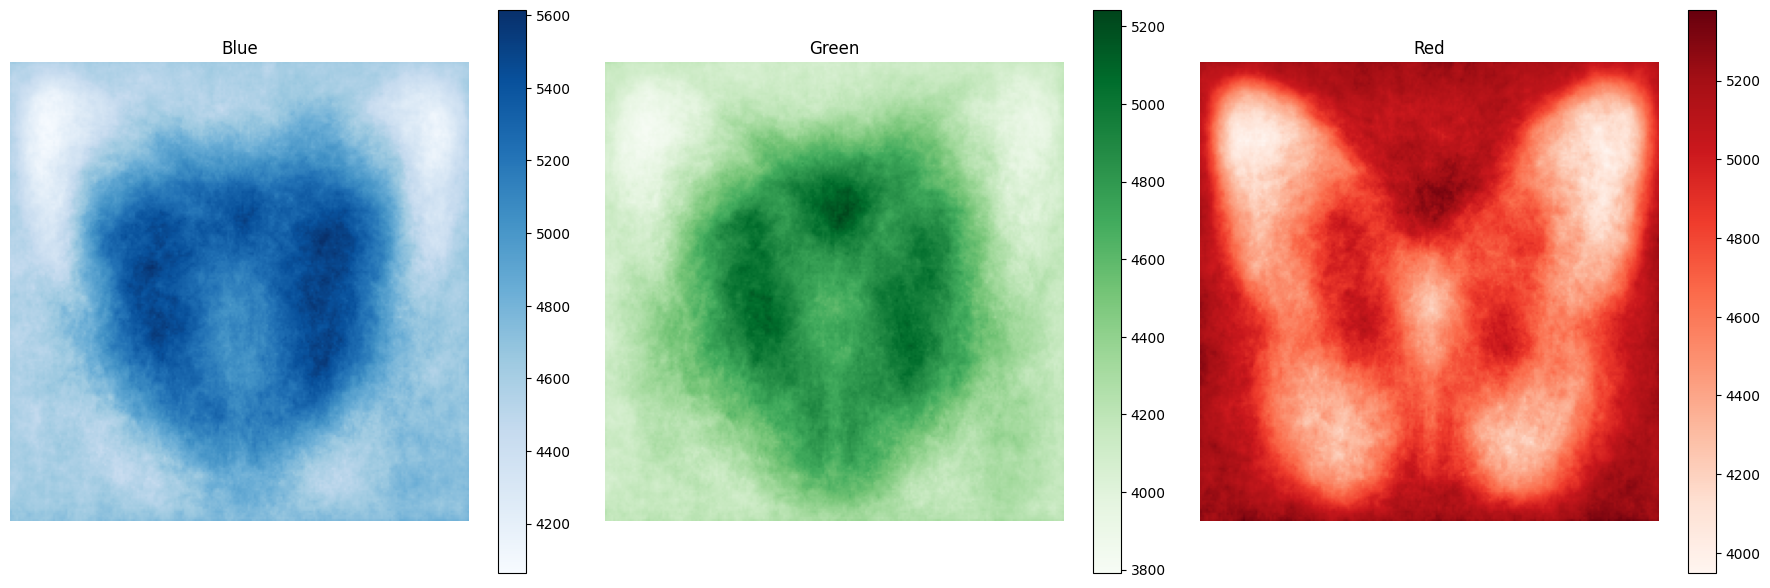

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].imshow(var_per_pixel_blue, aspect='equal', cmap=plt.cm.Blues)
axes[0].set_title('Blue')
axes[0].axis('off')
fig.colorbar(axes[0].images[0], ax=axes[0])

axes[1].imshow(var_per_pixel_green, aspect='equal', cmap=plt.cm.Greens)
axes[1].set_title('Green')
axes[1].axis('off')
fig.colorbar(axes[1].images[0], ax=axes[1])

axes[2].imshow(var_per_pixel_red, aspect='equal', cmap=plt.cm.Reds)
axes[2].set_title('Red')
axes[2].axis('off')
fig.colorbar(axes[2].images[0], ax=axes[2])

plt.tight_layout()
plt.show()

## Średnie natęzenie pikselów dla danego koloru

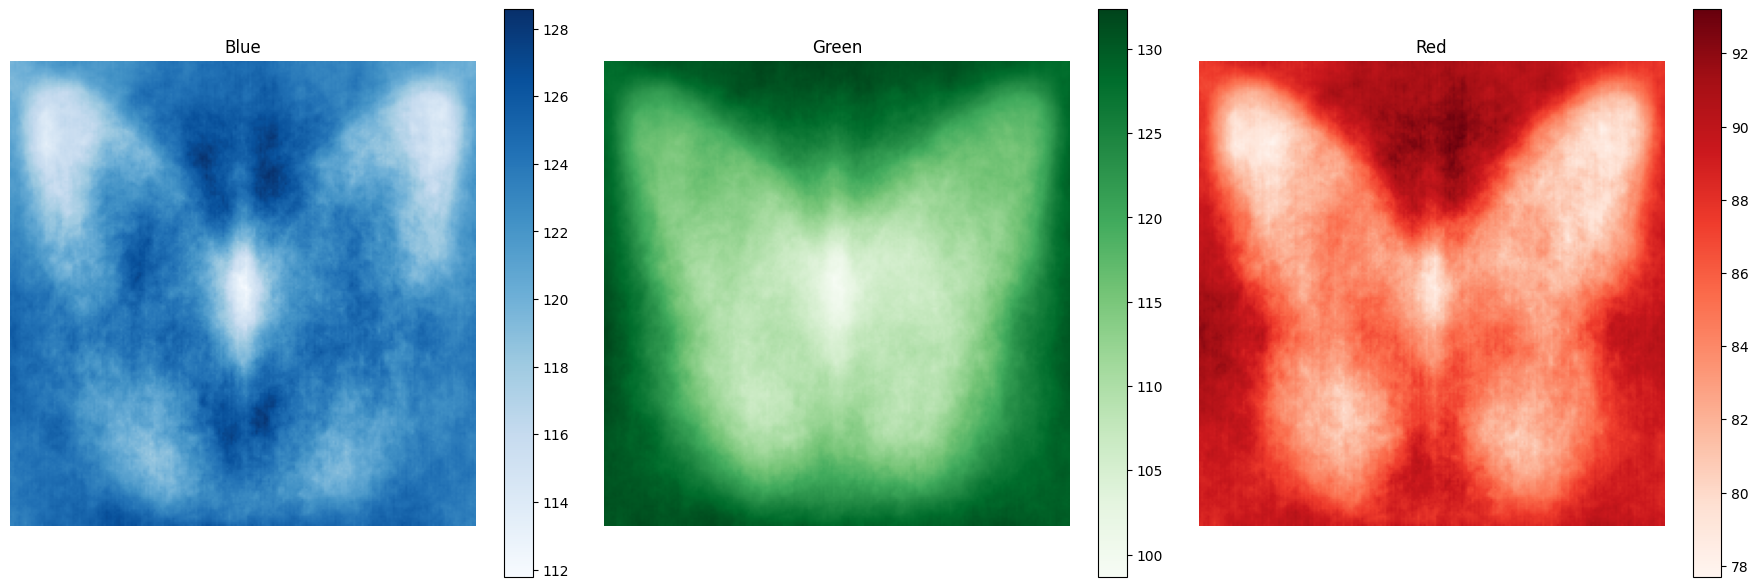

In [41]:
mean_per_pixel_blue = np.mean(blues2, axis=-1)
mean_per_pixel_green = np.mean(greens2, axis=-1)
mean_per_pixel_red = np.mean(reds2, axis=-1)

fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].imshow(mean_per_pixel_blue, aspect='equal', cmap=plt.cm.Blues)
axes[0].set_title('Blue')
axes[0].axis('off')
fig.colorbar(axes[0].images[0], ax=axes[0])

axes[1].imshow(mean_per_pixel_green, aspect='equal', cmap=plt.cm.Greens)
axes[1].set_title('Green')
axes[1].axis('off')
fig.colorbar(axes[1].images[0], ax=axes[1])

axes[2].imshow(mean_per_pixel_red, aspect='equal', cmap=plt.cm.Reds)
axes[2].set_title('Red')
axes[2].axis('off')
fig.colorbar(axes[2].images[0], ax=axes[2])

plt.tight_layout()
plt.show()

In [42]:
blues_mean = []
greens_mean = []
reds_mean = []

for img in imgs:
    b_channel, g_channel, r_channel = img[:, : ,0], img[:, : ,1], img[:, :, 2]
    blues_mean.append(b_channel.mean())
    greens_mean.append(g_channel.mean())
    reds_mean.append(r_channel.mean())

df['blue_mean'] = blues_mean
df['green_mean'] = greens_mean
df['red_mean'] = reds_mean

## Średnie natężenia danych kolorów
### Boxploty średnich natężeń

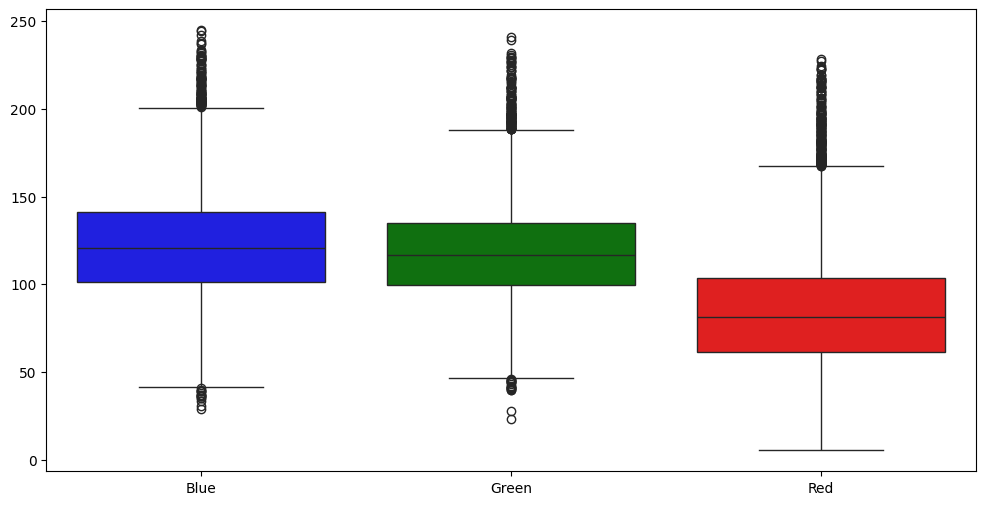

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['blue_mean', 'green_mean', 'red_mean']], palette=['blue','green','red'])
plt.xticks([0,1,2], ['Blue', 'Green', 'Red'])
plt.show()

### Histogramy średnich natężeń

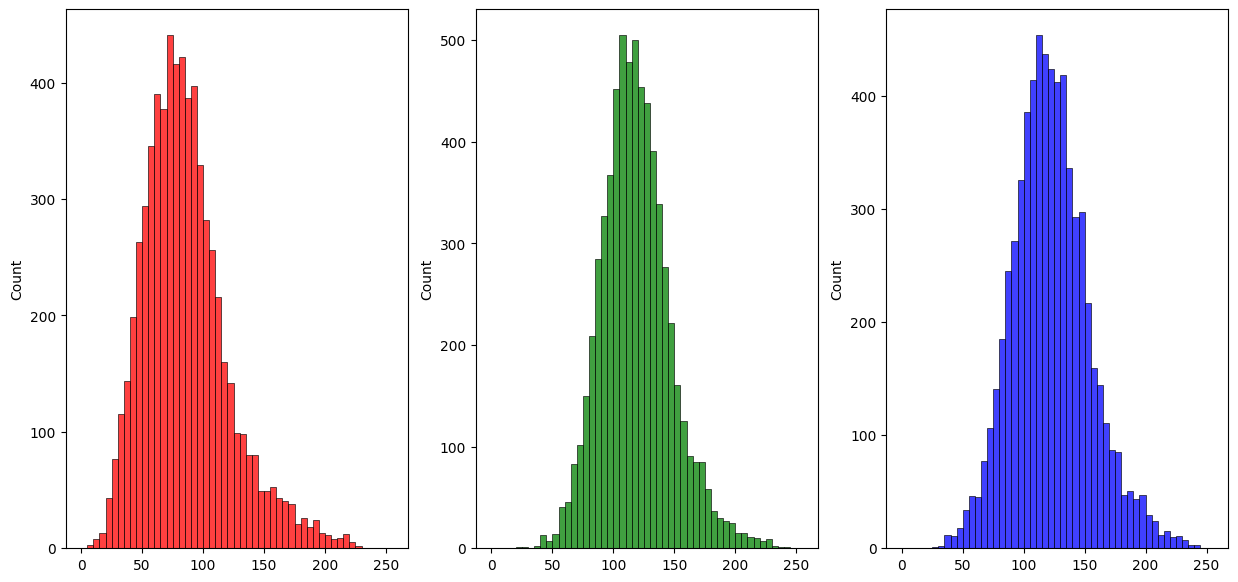

In [56]:
plt.figure(figsize=(15, 7))

bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 3)
sns.histplot(blues_mean, color="blue", bins=bins)

plt.subplot(1, 3, 2)
sns.histplot(greens_mean, color="green", bins=bins)

plt.subplot(1, 3, 1)
sns.histplot(reds_mean, color="red", bins=bins)

None

<Axes: ylabel='Count'>

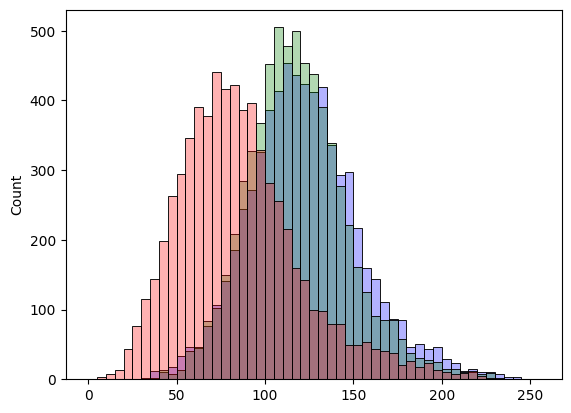

In [55]:
sns.histplot(blues_mean, color="blue", bins=bins, alpha=0.3)
sns.histplot(greens_mean, color="green", bins=bins, alpha=0.3)
sns.histplot(reds_mean, color="red", bins=bins, alpha=0.3)

In [63]:
blues_mean = []
greens_mean = []
reds_mean = []

for img in imgs:
    b_channel, g_channel, r_channel = img[:, : ,0].mean(axis=1).ravel(), img[:, : ,1].mean(axis=1).ravel(), img[:, :, 2].mean(axis=1).ravel()
    blues_mean.append(b_channel)
    greens_mean.append(g_channel)
    reds_mean.append(r_channel)

In [64]:
blue = np.array(blues_mean).ravel()
red = np.array(reds_mean).ravel()
green = np.array(greens_mean).ravel()

In [65]:
x = np.histogram(blue, bins=bins)

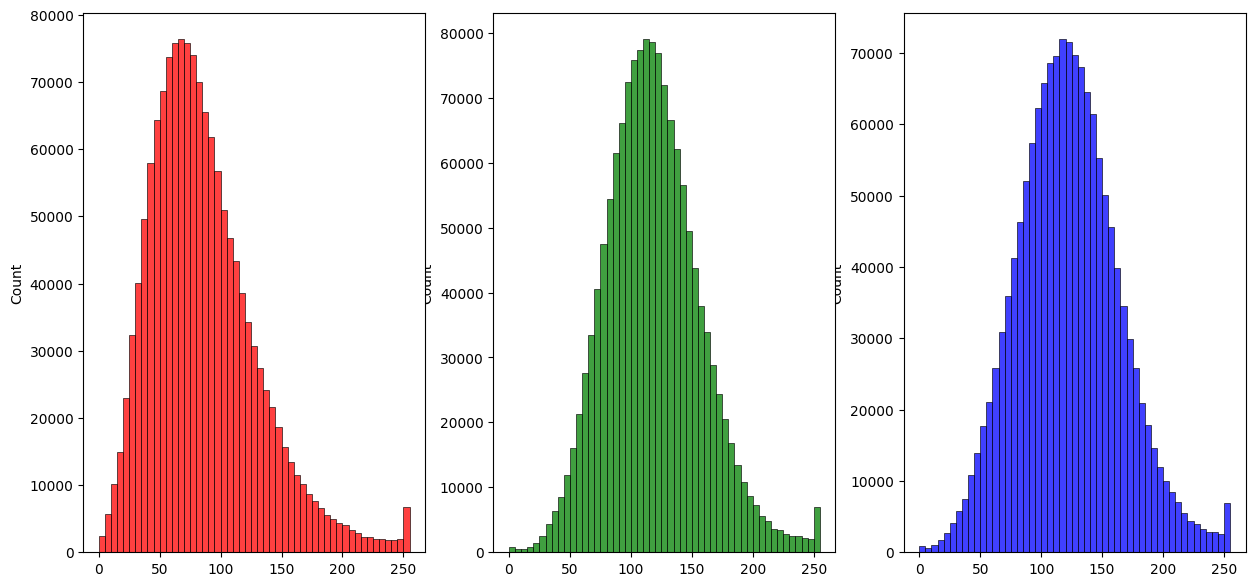

In [68]:
plt.figure(figsize=(15, 7))

bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 3)
sns.histplot(blue, color="blue", bins=bins)

plt.subplot(1, 3, 2)
sns.histplot(green, color="green", bins=bins)

plt.subplot(1, 3, 1)
sns.histplot(red, color="red", bins=bins)

None

<Axes: ylabel='Count'>

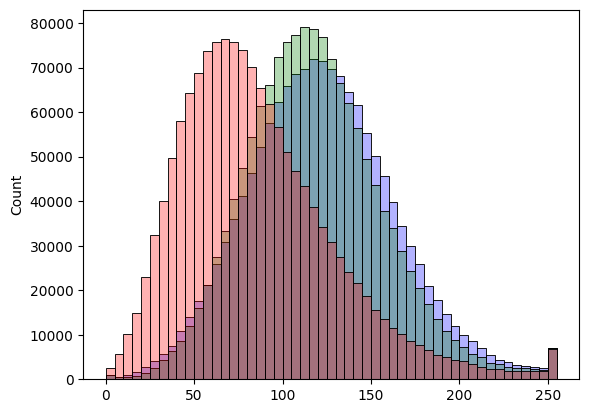

In [69]:
sns.histplot(blue, color="blue", bins=bins, alpha=0.3)
sns.histplot(green, color="green", bins=bins, alpha=0.3)
sns.histplot(red, color="red", bins=bins, alpha=0.3)

In [70]:
blues_mean = []
greens_mean = []
reds_mean = []

for img in imgs:
    b_channel, g_channel, r_channel = img[:, : ,0].mean(axis=0).ravel(), img[:, : ,1].mean(axis=0).ravel(), img[:, :, 2].mean(axis=0).ravel()
    blues_mean.append(b_channel)
    greens_mean.append(g_channel)
    reds_mean.append(r_channel)

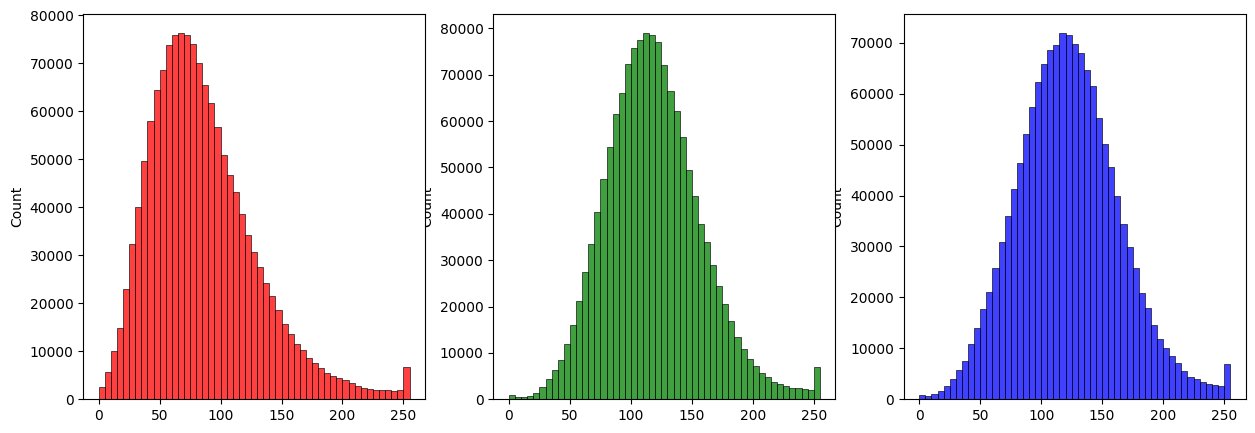

In [71]:
plt.figure(figsize=(15, 5))

bins = np.arange(0, 256, 5)

plt.subplot(1, 3, 3)
sns.histplot(blue, color="blue", bins=bins)

plt.subplot(1, 3, 2)
sns.histplot(green, color="green", bins=bins)

plt.subplot(1, 3, 1)
sns.histplot(red, color="red", bins=bins)

None

<Axes: ylabel='Count'>

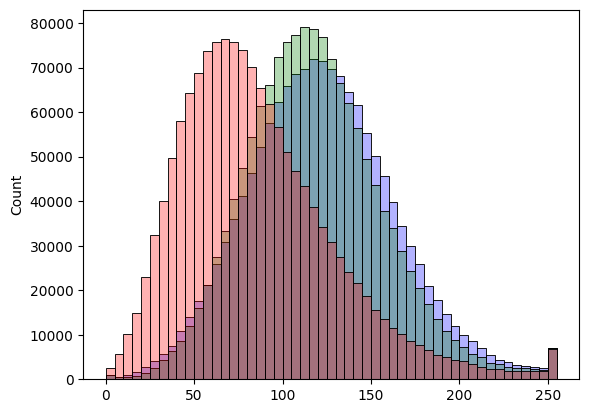

In [72]:
sns.histplot(blue, color="blue", bins=bins, alpha=0.3)
sns.histplot(green, color="green", bins=bins, alpha=0.3)
sns.histplot(red, color="red", bins=bins, alpha=0.3)

# Haralick featrures

In [32]:
grayscale_imgs = []

for img in imgs:
    grayscale_imgs.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))


In [42]:
features = []
for img in grayscale_imgs:
    feature = mahotas.features.haralick(img, return_mean=True)
    features.append(feature)


In [43]:
df_features = pd.DataFrame(features, columns=["ASM", "contrast", "correlation", "variance", "homogeneity", "sum_average", "sum_variance", "sum_entropy", "entropy", "diff_variance", "diff_entropy", "IMC1", "IMC2",])

In [46]:
df = pd.concat([df, df_features], axis=1)

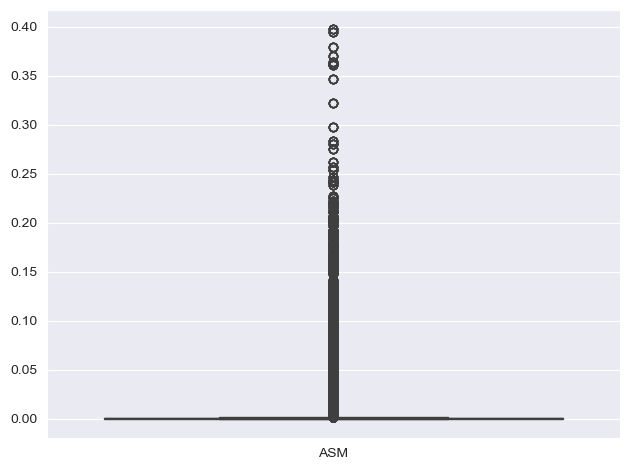

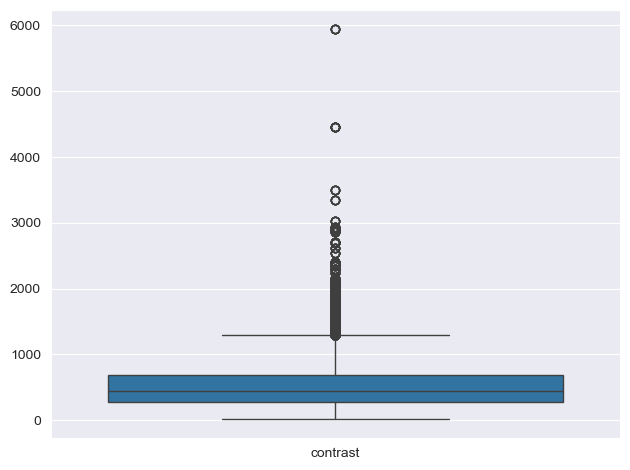

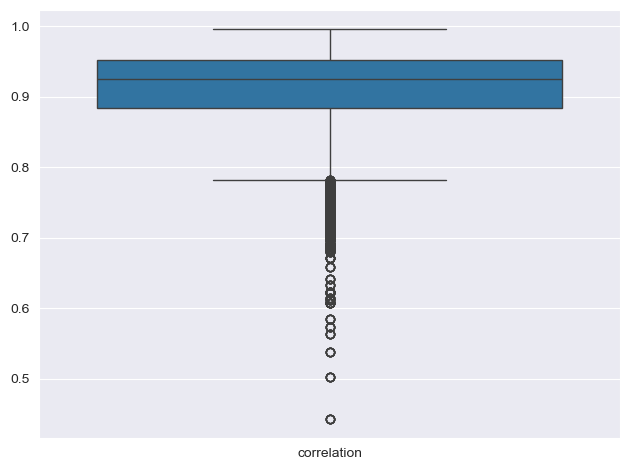

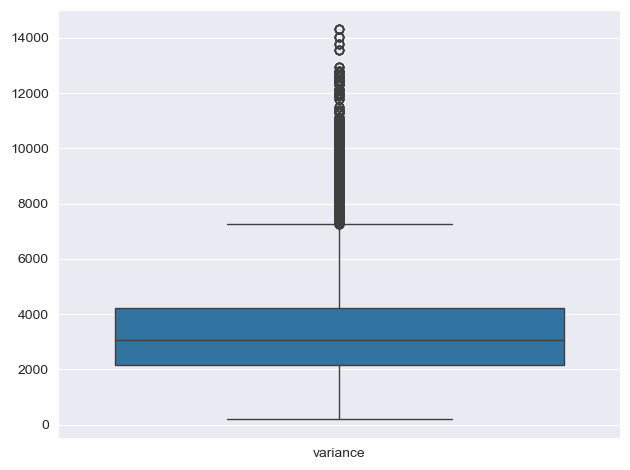

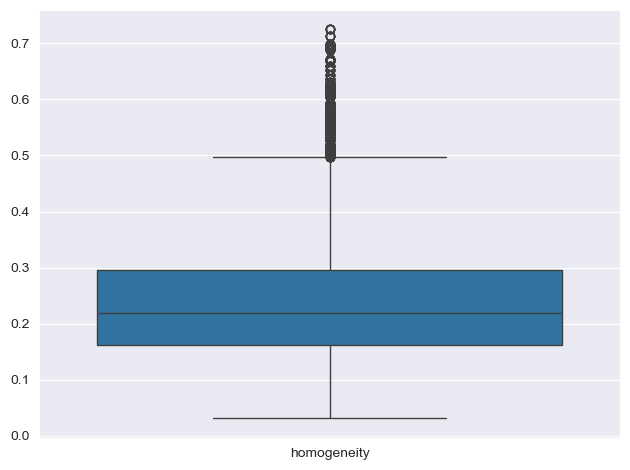

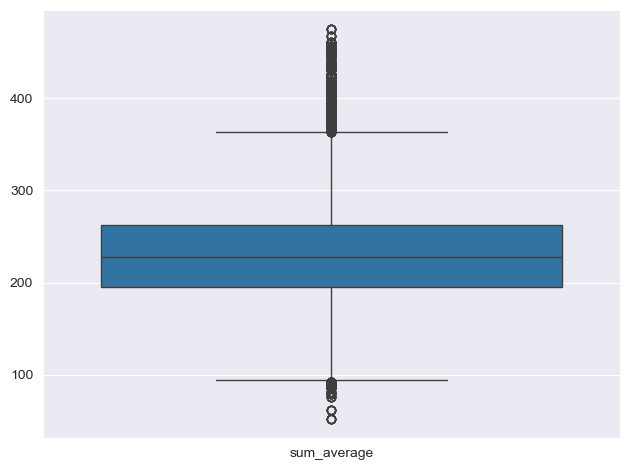

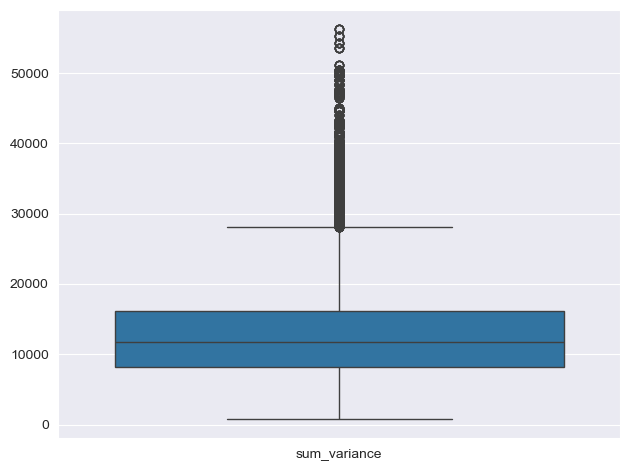

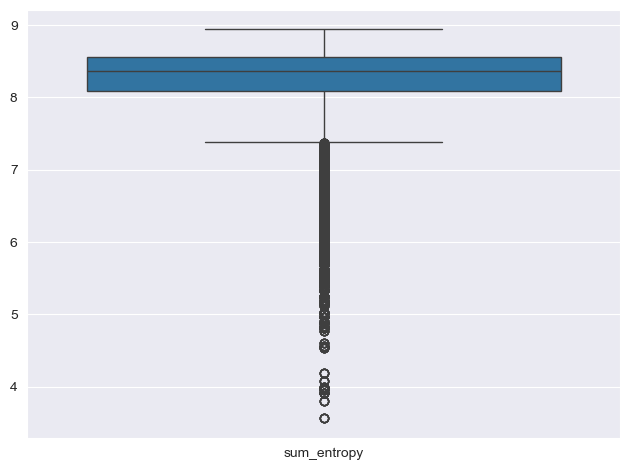

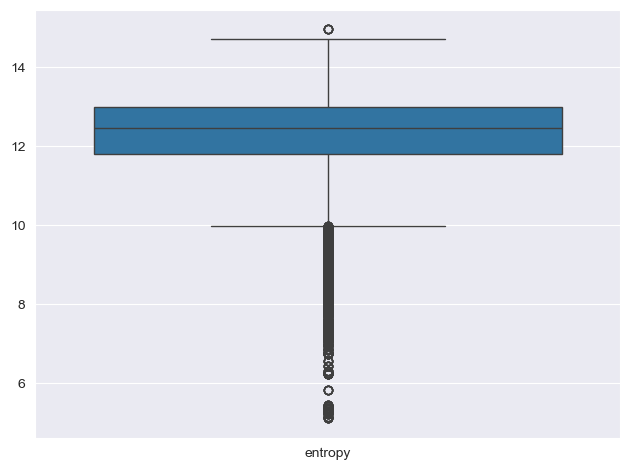

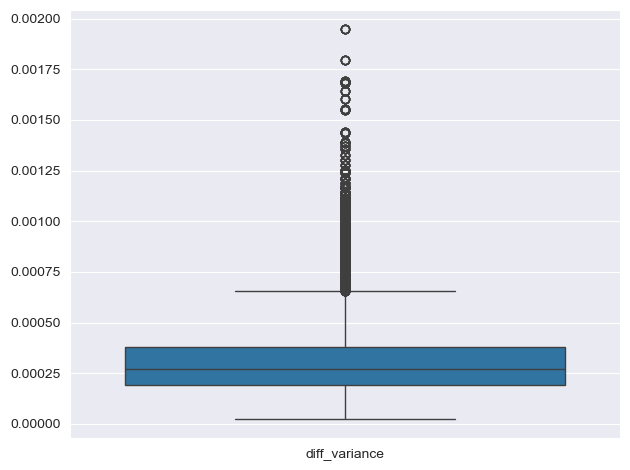

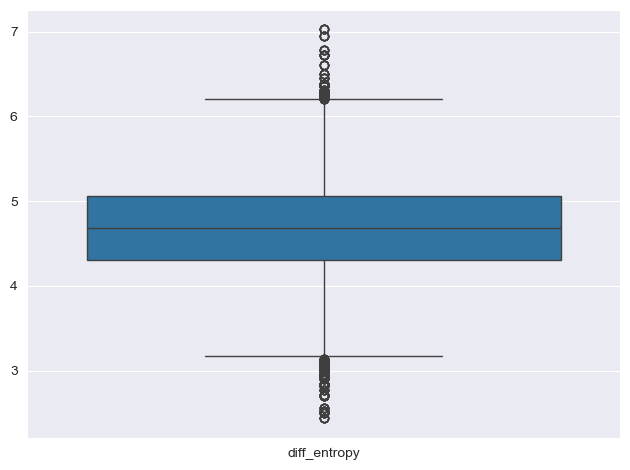

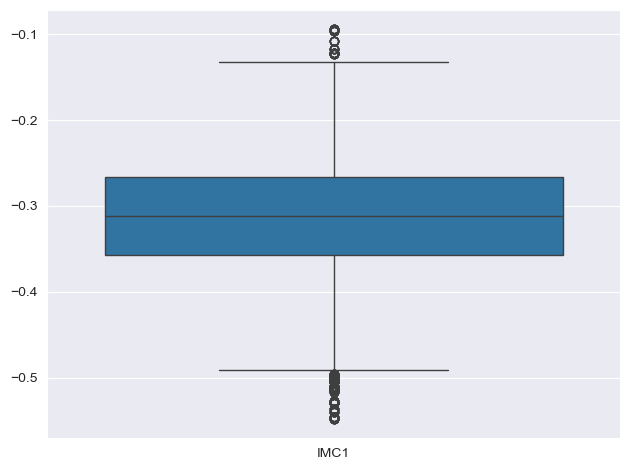

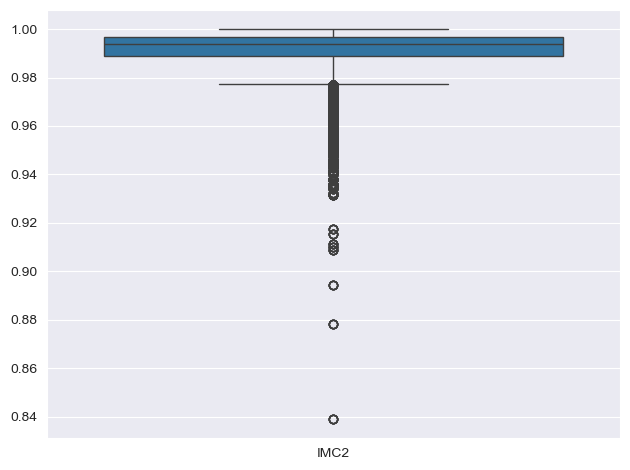

In [51]:
for feature in df_features.columns:
    plt.figure()
    sns.boxplot(data=df[feature])
    plt.tight_layout()
    plt.show()